## **Udacity Project 3 - Data Visualization**

## **Factors Affecting The Number of Bike Rides and Bike Ride Duration**


### Investigation Overview 
The aim of this data visualization project is to use visualizations to determine and communicate the factors affecting the daily number of bike rides, ride durations and distance and to determine who the riders are:what are their ages, gender, location?

### Dataset Overview 
The questions above will be answered using Ford GoBike Data from the month of February 2019. Ford GoBike is a bike sharing service in the Greater Bay Area of San Francisco, USA. The dataset consists of records of about 183,000 rides. The data features include duration of the rides, the location of the stations where the bike trip started and ended, the datetime, anonymized customer information such as customer type, birth year and gender and some other additional variables.



## Investigation Questions
 - How do bike usage patterns vary by time of day and day of the week?   
 - What are the most popular bike routes in the Bay Area?   
 - How does the duration of bike trips vary based on factors like age and gender?  
 - How long does the average bike ride take?  
 - What factors affect the length of a bike ride?   
 - Do weather conditions such as temperature and rainfall affect the daily number of trips?

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from IPython.display import clear_output
import pandas as pd

<a name="assessing"></a>

## Gathering and Assessing the Data

In [2]:
## gobike = pd.read_csv('201902-fordgobike-tripdata.csv', parse_dates=['start_time', 'end_time'])
gobike = pd.read_csv('/kaggle/input/ford-gobike-2019feb-tripdata/201902-fordgobike-tripdata.csv', parse_dates=['start_time', 'end_time'])
print(gobike.shape)
gobike.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
gobike = gobike.sort_values(by='end_time')

In [4]:
## Read in cached data containing information about the ride trips
trips_data = pd.read_csv('/kaggle/input/trips-data/trips_data (1).csv')
print(trips_data.shape)
trips_data.head()

(14275, 3)


,point_a,point_b,route
0,"37.80889393398715, -122.25646018981932","37.8090126, -122.2682473","{'type': 'FeatureCollection', 'features': [{'b..."
1,"37.77588, -122.39317","37.795392, -122.394203","{'type': 'FeatureCollection', 'features': [{'b..."
2,"37.3259984, -121.87712","37.3371223728942, -121.88321471214294","{'type': 'FeatureCollection', 'features': [{'b..."
3,"37.795392, -122.394203","37.80477, -122.403234","{'type': 'FeatureCollection', 'features': [{'b..."
4,"37.79413, -122.39443","37.80477, -122.403234","{'type': 'FeatureCollection', 'features': [{'b..."


In [5]:
weather_data = pd.read_csv('/kaggle/input/bay-area-weather-data-february-2019/201902_weather_data.csv', parse_dates=['datetime'])
print(weather_data.shape)
weather_data.head()

(2688, 7)


,datetime,temp,humidity,precip,precipprob,preciptype,region
0,2019-02-01 00:00:00,13.4,81.50,0.0,0,NaN,San Francisco
1,2019-02-01 01:00:00,13.2,79.68,0.0,0,NaN,San Francisco
2,2019-02-01 02:00:00,13.2,79.68,0.0,0,NaN,San Francisco
3,2019-02-01 03:00:00,13.1,80.11,0.0,0,NaN,San Francisco
4,2019-02-01 04:00:00,12.2,85.31,0.0,0,NaN,San Francisco


In [6]:
gobike.columns 

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183412 entries, 183411 to 0
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [8]:
gobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
print('Percentage of Missing Values By Columns')
pd.DataFrame(gobike.isna().sum()/gobike.shape[0]*100)

Percentage of Missing Values By Columns


,0
duration_sec,0.000000
start_time,0.000000
end_time,0.000000
start_station_id,0.107408
start_station_name,0.107408
start_station_latitude,0.000000
start_station_longitude,0.000000
end_station_id,0.107408
end_station_name,0.107408
end_station_latitude,0.000000


In [10]:
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


<a name="issues"></a>

### **Data Issues :**

1) The coordinate columns 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude' are in the float format. They should be represented in the string format.

2) The duration_sec feature is difficult to interpret. It would be easier if it were in minutes 

3) The user_type, member_gender, bike_share_for_all_trip columns are in string format but should be represented as categorical features.

4) There are 8265 records missing the member_gender and member_birth_year attributes.  

5) There are 197 rows in the dataset missing the station_id and station_name attributes. Upon further probing, the 197 rows missing station ids and names are due to 17 stations in the North San Jose Area that do not have names and ids to identify them.

6) The member_birth_year and [start/end]station_id are represented in the wrong format ie as floats instead of integers (due to missing values)

7) ~~The start_time and end_time columns should be in the datetime format.~~ Solved by parsing the columns as datetime columns while reading in the data using `parse_dates` parameter

<a name="cleaning"></a>

## Data Cleaning

In [11]:
#### ISSUE 1 ::
coordinate_cols = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
gobike[coordinate_cols] = gobike[coordinate_cols].astype(str)

In [12]:
#### ISSUE 2 ::
gobike['duration_min'] = gobike['duration_sec']/60
gobike = gobike.drop(columns=['duration_sec'])

In [13]:
#### ISSUE 3 ::
nominal_categorical_cols = ['user_type', 'member_gender', 'bike_share_for_all_trip']
gobike[nominal_categorical_cols] = gobike[nominal_categorical_cols].astype('category')

In [14]:
#### ISSUE 4 ::
gobike['member_gender'].value_counts(dropna=False)

Male      130651
Female     40844
NaN         8265
Other       3652
Name: member_gender, dtype: int64

In [15]:
# Are all the rows missing the member_gender column missing the member_birth_year as well? 
# Check whether there are any columns that have missing_gender but are not missing member_birth_year
gobike[gobike['member_gender'].isna() & gobike['member_birth_year'].notna()]

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min


As it turns out, all the entries that are missing the `member_gender` are also missing the `member_birth_year` features. This constitutes only 4 percent of the total number of records. Since finding a way to impute the missing gender and birth year values is beyond the scope of this project, we will drop these rows 

In [16]:
gobike = gobike.dropna(subset=['member_birth_year', 'member_gender']).copy()

<a name="feature_engineering"></a>

## Feature Engineering

We are going to add some new features that will make our analysis a lot easier

In [17]:
## Add a new column 'member_age' which is the age of the member at the time the data was recorded
gobike['member_age'] = (2019-gobike['member_birth_year']).astype(int)
gobike.drop(columns=['member_birth_year'], inplace=True)
gobike[['member_age']].describe(percentiles=[.05, .25, .5, .75, .999])

,member_age
count,175147.000000
mean,34.193563
std,10.116689
min,18.000000
5%,22.000000
25%,27.000000
50%,32.000000
75%,39.000000
99.9%,86.000000
max,141.000000


There are some outliers in the age column which we will need to deal with. We will clip the maximum age to the 99.9'th percentile value `(86 years)` 

In [18]:
## Clip the member age values to the 99.9 percentile of age value; 86
gobike['member_age'] = np.clip(gobike['member_age'], 18, 86)

In [19]:
## Add the coordinates column containing the station latitude and longitude in the format :[lat, lon]
gobike['start_coordinates'] = (gobike['start_station_latitude'].str.strip() + ', ' +
                               gobike['start_station_longitude'].str.strip())
gobike['end_coordinates'] = (gobike['end_station_latitude'].str.strip() + ', ' + 
                             gobike['end_station_longitude'].str.strip())

In [20]:
start_stations = gobike[['start_station_name', 'start_coordinates', 'start_station_latitude', 
                         'start_station_longitude', 'start_station_id']].drop_duplicates()

end_stations = gobike[['end_station_name', 'end_coordinates', 'end_station_latitude',
                       'end_station_longitude', 'end_station_id']].drop_duplicates()
 
column_names = ['station_name', 'coordinates', 'station_latitude', 'station_longitude', 'station_id']

start_stations.columns = column_names
end_stations.columns = column_names

stations = pd.concat([start_stations, end_stations], axis=0).drop_duplicates()

print('stations shape : ', stations.shape)
display(stations.head())

stations shape :  (346, 5)


,station_name,coordinates,station_latitude,station_longitude,station_id
183411,Spear St at Folsom St,"37.7896767, -122.3904285",37.7896767,-122.3904285,24.0
183410,San Pablo Ave at MLK Jr Way,"37.8113514, -122.2734217",37.8113514,-122.2734217,220.0
183409,The Alameda at Bush St,"37.3319323, -121.9048882",37.3319323,-121.9048882,278.0
183408,Montgomery St BART Station (Market St at 2nd St),"37.7896254, -122.400811",37.7896254,-122.400811,21.0
183407,Beale St at Harrison St,"37.7880593, -122.3918648",37.7880593,-122.3918648,27.0


There are 346 unique stations in the dataset. We will go ahead and look at the ones missing station name and station ids

In [21]:
missing_station_names_df = stations[(stations['station_name'].isna()) | (stations['station_id'].isna())].copy()
missing_station_names_df

,station_name,coordinates,station_latitude,station_longitude,station_id
181201,NaN,"37.4, -121.93",37.4,-121.93,NaN
180106,NaN,"37.4, -121.94",37.4,-121.94,NaN
179970,NaN,"37.41, -121.96",37.41,-121.96,NaN
161844,NaN,"37.41, -121.94",37.41,-121.94,NaN
152648,NaN,"37.4, -121.92",37.4,-121.92,NaN
152178,NaN,"37.41, -121.95",37.41,-121.95,NaN
144928,NaN,"37.42, -121.94",37.42,-121.94,NaN
142719,NaN,"37.41, -121.98",37.41,-121.98,NaN
132593,NaN,"37.42, -121.95",37.42,-121.95,NaN
131475,NaN,"37.42, -121.96",37.42,-121.96,NaN


There are 17 stations that have both the station_name and station_id missing and they all appear to be from the same geographical locality just by inspection of their coordinates. We will query the coordinates of the stations missing station names using [geopy](https://geopy.readthedocs.io/)'s reverse geolocator to get appropriate descriptive names for the stations.We will also give these stations unique ids.

The coordinates are all low precision (single or double digit decimal precision) unlike the other stations which have very high precision (upto 5 digit decimal precision). For perspective, a value in decimal degrees to an accuracy of 4 decimal places is accurate to 11.1 meters (+/- 5.55 m) at the equator, while a value in decimal degrees to 2 decimal places is accurate to 1.11 kilometers at the equator. [Source](http://wiki.gis.com/wiki/index.php/Decimal_degrees)

Due to the low precision of the coordinates with missing station names, we might not be able to get the exact name of the station but we will use the location nearest to the given coordinates. 

The stations data is plotted on a map below

In [22]:
### Plot the distribution of stations in the map
import folium
from folium.plugins import Draw
from IPython.display import FileLink

min_lat = min(gobike['start_station_latitude'].astype(float).min(), gobike['end_station_latitude'].astype(float).min())
min_lon = min(gobike['start_station_longitude'].astype(float).min(), gobike['end_station_longitude'].astype(float).min())
max_lat = max(gobike['start_station_latitude'].astype(float).max(), gobike['end_station_latitude'].astype(float).max())
max_lon = max(gobike['start_station_longitude'].astype(float).max(), gobike['end_station_longitude'].astype(float).max())

location = [(min_lat+max_lat)/2, (min_lon+max_lon)/2]
m = folium.Map(location)

gobike.sample(20000).apply(lambda x : folium.CircleMarker([x.start_station_latitude, x.start_station_longitude], radius=4, color='', fill_color='blue' if str(x.start_station_name)!='nan' else 'red', fill_opacity=0.2).add_to(m), axis=1)
gobike.sample(20000).apply(lambda x : folium.CircleMarker([x.end_station_latitude, x.end_station_longitude], radius=4, color='', fill_color='blue' if str(x.end_station_name)!='nan' else 'red', fill_opacity=0.2).add_to(m), axis=1)

m.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]], padding=[10,10])

Draw().add_to(m)

m.save('map1.html')
display(FileLink('map1.html', result_html_prefix='Map HTML :: '))


/kaggle/working/map1.html

In [23]:
#from IPython.display import HTML, IFrame
#display(HTML(filename='stations_map.html'))

In [24]:
## assigning unique ids to the stations
max_id = stations['station_id'].max()
missing_station_names_df['station_id'] = np.arange(max_id, max_id+len(missing_station_names_df))+1
missing_station_names_df

,station_name,coordinates,station_latitude,station_longitude,station_id
181201,NaN,"37.4, -121.93",37.4,-121.93,399.0
180106,NaN,"37.4, -121.94",37.4,-121.94,400.0
179970,NaN,"37.41, -121.96",37.41,-121.96,401.0
161844,NaN,"37.41, -121.94",37.41,-121.94,402.0
152648,NaN,"37.4, -121.92",37.4,-121.92,403.0
152178,NaN,"37.41, -121.95",37.41,-121.95,404.0
144928,NaN,"37.42, -121.94",37.42,-121.94,405.0
142719,NaN,"37.41, -121.98",37.41,-121.98,406.0
132593,NaN,"37.42, -121.95",37.42,-121.95,407.0
131475,NaN,"37.42, -121.96",37.42,-121.96,408.0


In [25]:
!pip install geopy
from IPython.display import clear_output
clear_output()

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="udacity project 3")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

missing_station_names_df['location_raw'] = missing_station_names_df['coordinates'].apply(lambda x : reverse(x).raw)
missing_station_names_df['road'] = missing_station_names_df['location_raw'].apply(lambda x : x['address']['road'])
missing_station_names_df['postcode'] = missing_station_names_df['location_raw'].apply(lambda x : x['address']['postcode'])
missing_station_names_df['station_name'] = missing_station_names_df['road'] + ", " + missing_station_names_df['postcode'] + ", North San Jose"
missing_station_names_df

,station_name,coordinates,station_latitude,station_longitude,station_id,location_raw,road,postcode
181201,"Innovation Drive, 95134, North San Jose","37.4, -121.93",37.4,-121.93,399.0,"{'place_id': 271123731, 'licence': 'Data © Ope...",Innovation Drive,95134
180106,"Guadalupe River Trail, 95134, North San Jose","37.4, -121.94",37.4,-121.94,400.0,"{'place_id': 161760040, 'licence': 'Data © Ope...",Guadalupe River Trail,95134
179970,"Levee Regional Trail, 95002, North San Jose","37.41, -121.96",37.41,-121.96,401.0,"{'place_id': 248707543, 'licence': 'Data © Ope...",Levee Regional Trail,95002
161844,"Baypointe Parkway, 95134, North San Jose","37.41, -121.94",37.41,-121.94,402.0,"{'place_id': 94052172, 'licence': 'Data © Open...",Baypointe Parkway,95134
152648,"Epic Way, 95134, North San Jose","37.4, -121.92",37.4,-121.92,403.0,"{'place_id': 98813577, 'licence': 'Data © Open...",Epic Way,95134
152178,"Champion Court, 95134, North San Jose","37.41, -121.95",37.41,-121.95,404.0,"{'place_id': 163060305, 'licence': 'Data © Ope...",Champion Court,95134
144928,"Zanker Road, 95134, North San Jose","37.42, -121.94",37.42,-121.94,405.0,"{'place_id': 330015911, 'licence': 'Data © Ope...",Zanker Road,95134
142719,"Old Mountain View-Alviso Road, 95002, North Sa...","37.41, -121.98",37.41,-121.98,406.0,"{'place_id': 70667129, 'licence': 'Data © Open...",Old Mountain View-Alviso Road,95002
132593,"Southbay Freeway, 95134, North San Jose","37.42, -121.95",37.42,-121.95,407.0,"{'place_id': 225873104, 'licence': 'Data © Ope...",Southbay Freeway,95134
131475,"North 1st Street, 95002, North San Jose","37.42, -121.96",37.42,-121.96,408.0,"{'place_id': 116816374, 'licence': 'Data © Ope...",North 1st Street,95002


In [26]:
stations.drop(index=missing_station_names_df.index, inplace=True)
stations = pd.concat([stations, missing_station_names_df[stations.columns]], axis=0)
stations['station_id'] = stations['station_id'].astype(int)

In [27]:
## Check that the station_name and station_id columns have been updated on the `stations` table
stations.loc[missing_station_names_df.index]

,station_name,coordinates,station_latitude,station_longitude,station_id
181201,"Innovation Drive, 95134, North San Jose","37.4, -121.93",37.4,-121.93,399
180106,"Guadalupe River Trail, 95134, North San Jose","37.4, -121.94",37.4,-121.94,400
179970,"Levee Regional Trail, 95002, North San Jose","37.41, -121.96",37.41,-121.96,401
161844,"Baypointe Parkway, 95134, North San Jose","37.41, -121.94",37.41,-121.94,402
152648,"Epic Way, 95134, North San Jose","37.4, -121.92",37.4,-121.92,403
152178,"Champion Court, 95134, North San Jose","37.41, -121.95",37.41,-121.95,404
144928,"Zanker Road, 95134, North San Jose","37.42, -121.94",37.42,-121.94,405
142719,"Old Mountain View-Alviso Road, 95002, North Sa...","37.41, -121.98",37.41,-121.98,406
132593,"Southbay Freeway, 95134, North San Jose","37.42, -121.95",37.42,-121.95,407
131475,"North 1st Street, 95002, North San Jose","37.42, -121.96",37.42,-121.96,408


In [28]:
stations = stations.set_index('coordinates')
stations['num_start_trips'] = gobike['start_coordinates'].value_counts()
stations['num_end_trips'] = gobike['end_coordinates'].value_counts()
stations['total_num_trips'] = stations['num_start_trips'] + stations['num_end_trips']
stations['start_trips_avg_duration'] = gobike.groupby('start_coordinates')['duration_min'].mean()
stations['end_trips_avg_duration'] = gobike.groupby('end_coordinates')['duration_min'].mean()
stations.head()

,station_name,station_latitude,station_longitude,station_id,num_start_trips,num_end_trips,total_num_trips,start_trips_avg_duration,end_trips_avg_duration
coordinates,,,,,,,,,
"37.7896767, -122.3904285",Spear St at Folsom St,37.7896767,-122.3904285,24,1113.0,1116,2229.0,13.060737,12.894146
"37.8113514, -122.2734217",San Pablo Ave at MLK Jr Way,37.8113514,-122.2734217,220,109.0,117,226.0,11.766055,11.722507
"37.3319323, -121.9048882",The Alameda at Bush St,37.3319323,-121.9048882,278,305.0,313,618.0,8.820710,7.442492
"37.7896254, -122.400811",Montgomery St BART Station (Market St at 2nd St),37.7896254,-122.400811,21,2711.0,3461,6172.0,11.963673,11.786252
"37.7880593, -122.3918648",Beale St at Harrison St,37.7880593,-122.3918648,27,1678.0,1780,3458.0,10.188300,9.399860


In [29]:
### Map out the stations aggin the dataset. 
### Use size to represent the activity at the station and color to represent whether the station is named
import folium
from folium.plugins import Draw

location = [(min_lat+max_lat)/2, (min_lon+max_lon)/2]
m2 = folium.Map(location)


stations.apply(lambda x : folium.CircleMarker([x.station_latitude, x.station_longitude], radius=x.num_start_trips/400+3, color='', fill_color='blue' if str(x.station_name)!='nan' else 'red', fill_opacity=0.7).add_to(m2), axis=1)

m2.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]], padding=[10,10])

Draw().add_to(m2)
m2.save('map2.html')
display(FileLink('map2.html', result_html_prefix='Map HTML :: '))

/kaggle/working/map2.html

From the map it is evident that the bike stations are clustered in 4 different geographical regions with different concentrations

The regions can be separated out using rectangular bouding boxes. Therefore, we will add a new region column using the stations' coordinates below

In [30]:
def add_region_columns(df, lat, lon, region_col):
    region_boundaries_dict = {
                   'San Francisco' : [37.72, 37.82, -122.48, -122.36], ## --> min_lat, max_lat, min_long, max_long  
                   'East Bay' : [37.76, 37.90, -122.35, -122.20],## (Oakland, Berkeley and Emeryville)
                   'East San Jose' : [37.31, 37.37, -121.92, -121.86],  
                   'North San Jose' : [37.371, 37.44, -121.99, -121.9]}

    ## create City Column and enter empty strings as column placeholders 
    df[region_col] = ''

    ## loop through the boundaries dict replacing the NaNs in the city column with respective cities
    for region in region_boundaries_dict:
        lat_min, lat_max, lon_min, lon_max = region_boundaries_dict[region]
        lat_filt = (df[lat].astype(float)>lat_min) & (df[lat].astype(float)<lat_max)
        lon_filt = (df[lon].astype(float)>lon_min) & (df[lon].astype(float)<lon_max)
        df.loc[lat_filt & lon_filt, region_col] = region

add_region_columns(stations, 'station_latitude', 'station_longitude', 'region')

In [31]:
## Distribution of the stations in the regions
stations.region.value_counts(dropna=False)

San Francisco     156
East Bay          127
East San Jose      46
North San Jose     17
Name: region, dtype: int64

In [32]:
gobike['start_region'] = gobike.start_coordinates.apply(lambda x : stations.loc[x, 'region'])
gobike['end_region'] = gobike.end_coordinates.apply(lambda x : stations.loc[x, 'region'])

In [33]:
gobike['start_station_id'] = gobike.start_coordinates.apply(lambda x : stations.loc[x, 'station_id'])
gobike['end_station_id'] = gobike.end_coordinates.apply(lambda x : stations.loc[x, 'station_id'])

In [34]:
gobike['start_station_name'] = gobike.start_coordinates.apply(lambda x : stations.loc[x, 'station_name'])
gobike['end_station_name'] = gobike.end_coordinates.apply(lambda x : stations.loc[x, 'station_name'])

In [35]:
gobike.start_region.value_counts(dropna=False)

San Francisco     126764
East Bay           40227
East San Jose       7961
North San Jose       195
Name: start_region, dtype: int64

In [36]:
gobike.end_region.value_counts(dropna=False)

San Francisco     126769
East Bay           40221
East San Jose       7962
North San Jose       195
Name: end_region, dtype: int64

In [37]:
gobike.columns, weather_data.columns

(Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
        'start_station_latitude', 'start_station_longitude', 'end_station_id',
        'end_station_name', 'end_station_latitude', 'end_station_longitude',
        'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip',
        'duration_min', 'member_age', 'start_coordinates', 'end_coordinates',
        'start_region', 'end_region'],
       dtype='object'),
 Index(['datetime', 'temp', 'humidity', 'precip', 'precipprob', 'preciptype',
        'region'],
       dtype='object'))

In [38]:
gobike['temp_datetime'] = gobike['start_time'].dt.floor('D')
gobike = gobike.merge(weather_data.rename(columns={'datetime':'temp_datetime', 'region':'start_region'}),
             on=['temp_datetime', 'start_region'], copy=False)
gobike = gobike.drop(columns=['temp_datetime'])

In [39]:
from ast import literal_eval
dict_list = []
for i,v in enumerate(trips_data['route']):
    route = literal_eval(v)
    row_dict = {
            'route_distance_m' : route['features'][0]['properties']['segments'][0]['distance'],
            'route_duration_min' : route['features'][0]['properties']['segments'][0]['duration']/60,
            'route_geometry' : route['features'][0]['geometry']['coordinates'],
            'route_segments_steps' : route['features'][0]['properties']['segments'][0]['steps'],
        }
    dict_list.append(row_dict)

df = pd.DataFrame(dict_list)
trips_data = trips_data.merge(df, left_index=True, right_index=True)
trips_data.head()

,point_a,point_b,route,route_distance_m,route_duration_min,route_geometry,route_segments_steps
0,"37.80889393398715, -122.25646018981932","37.8090126, -122.2682473","{'type': 'FeatureCollection', 'features': [{'b...",1334.7,4.546667,"[[-122.256463, 37.808877], [-122.256539, 37.80...","[{'distance': 60.9, 'duration': 12.2, 'type': ..."
1,"37.77588, -122.39317","37.795392, -122.394203","{'type': 'FeatureCollection', 'features': [{'b...",2769.0,9.236667,"[[-122.393197, 37.775902], [-122.393235, 37.77...","[{'distance': 9.7, 'duration': 1.9, 'type': 11..."
2,"37.3259984, -121.87712","37.3371223728942, -121.88321471214294","{'type': 'FeatureCollection', 'features': [{'b...",1963.6,6.720000,"[[-121.877137, 37.32599], [-121.877187, 37.326...","[{'distance': 8.9, 'duration': 5.3, 'type': 11..."
3,"37.795392, -122.394203","37.80477, -122.403234","{'type': 'FeatureCollection', 'features': [{'b...",1421.0,4.936667,"[[-122.394076, 37.795465], [-122.394112, 37.79...","[{'distance': 76.5, 'duration': 15.3, 'type': ..."
4,"37.79413, -122.39443","37.80477, -122.403234","{'type': 'FeatureCollection', 'features': [{'b...",1658.7,6.170000,"[[-122.394464, 37.794103], [-122.394757, 37.79...","[{'distance': 36.5, 'duration': 21.9, 'type': ..."


In [40]:
trips_data[['route_geometry', 'route_segments_steps']] = trips_data[['route_geometry', 'route_segments_steps']].astype(str)
trips_data = trips_data.drop(columns=['route'])

In [41]:
gobike['start_dayofweek'] = gobike['start_time'].apply(lambda x : x.strftime('%A'))
gobike['start_hour'] = gobike['start_time'].apply(lambda x : x.strftime('%-I%p'))
gobike['end_dayofweek'] = gobike['end_time'].apply(lambda x : x.strftime('%A'))
gobike['end_hour'] = gobike['end_time'].apply(lambda x : x.strftime('%-I%p'))

hours_order = ['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM','12PM', 
          '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM',  '8PM', '9PM', '10PM', '11PM']

hour_dtype = pd.api.types.CategoricalDtype(categories=hours_order, ordered=True)
gobike['start_hour'] = gobike.start_hour.astype(hour_dtype)
gobike['end_hour'] = gobike.end_hour.astype(hour_dtype)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_dtype = pd.api.types.CategoricalDtype(categories=days_order, ordered=True)
gobike['start_dayofweek'] = gobike.start_dayofweek.astype(day_dtype)
gobike['end_dayofweek'] = gobike.end_dayofweek.astype(day_dtype)


In [42]:
## Create new `point_a` and `point_b` columns to Merge the gobike and routes_df columns
gobike['start_coordinates'] = gobike['start_station_latitude'].str.strip() + ', ' + gobike['start_station_longitude'].str.strip()
gobike['end_coordinates'] = gobike['end_station_latitude'].str.strip() + ', ' + gobike['end_station_longitude'].str.strip()

gobike.loc[gobike['start_coordinates'] > gobike['end_coordinates'], 'point_a'] = gobike['end_coordinates']
gobike.loc[gobike['start_coordinates'] > gobike['end_coordinates'], 'point_b'] = gobike['start_coordinates']

gobike.loc[gobike['start_coordinates'] <= gobike['end_coordinates'], 'point_a'] = gobike['start_coordinates']
gobike.loc[gobike['start_coordinates'] <= gobike['end_coordinates'], 'point_b'] = gobike['end_coordinates']


print(f'gobike shape before merge : {gobike.shape}')
gobike = gobike.merge(trips_data, on=['point_a', 'point_b'])
print(f'gobike shape after merge : {gobike.shape}')

gobike shape before merge : (175147, 31)
gobike shape after merge : (175147, 35)


In [43]:
trips_data.set_index(['point_a', 'point_b'], inplace=True)
trips_data['average_trip_duration_m'] = gobike.groupby(['point_a', 'point_b'])['duration_min'].mean().sort_values()
trips_data['trip_counts'] = gobike.groupby(['point_a', 'point_b'])['start_station_id'].count()
trips_data.reset_index(inplace=True)

We will add a `geodesic_distance` column to compare with the `route_distance`.  
Geodesic distance is the shortest distance between two geographical points along the surface of the earth. We will use the [**haversine**](https://pypi.org/project/haversine/) Python library to calculate the geodesic distance between the start and end stations for every trip.  
We will then assert that the route distance between any two stations is always at least greater than the geodesic distance between the stations. We will also draw the routes between any stations that are much longer than the geodesic distance between the stations to visually inspect.

In [44]:
!pip install haversine
from IPython.display import clear_output
clear_output()
import haversine as hs

def get_distance(lat1, lon1, lat2, lon2):
    return hs.haversine((lat1, lon1), (lat2, lon2), 'm')

trips_data['geodesic_distance_m'] = trips_data.apply(lambda x : get_distance(float(x.point_a.split(',')[0].strip()), float(x.point_a.split(',')[1].strip()), 
                                     float(x.point_b.split(',')[0].strip()), float(x.point_b.split(',')[1].strip())), axis=1)

In [45]:
## Check trips in which the geodesic distance is greater than the route distance
trips_data[trips_data['geodesic_distance_m'] > trips_data['route_distance_m']]

,point_a,point_b,route_distance_m,route_duration_min,route_geometry,route_segments_steps,average_trip_duration_m,trip_counts,geodesic_distance_m
357,"37.7524278, -122.4206278","37.7567083, -122.421025",477.2,1.590000,"[[-122.420695, 37.752424], [-122.42079, 37.753...","[{'distance': 477.2, 'duration': 95.4, 'type':...",4.542117,74.0,477.249789
455,"37.750506, -122.4339496","37.7509004, -122.4274114",576.5,1.921667,"[[-122.433948, 37.750494], [-122.43377, 37.750...","[{'distance': 576.5, 'duration': 115.3, 'type'...",3.522656,64.0,576.508720
464,"37.76704457969368, -122.39083349704742","37.7704074, -122.3911984",375.3,1.251667,"[[-122.390853, 37.767043], [-122.390872, 37.76...","[{'distance': 375.3, 'duration': 75.1, 'type':...",2.950606,55.0,375.302174
467,"37.7524278, -122.4206278","37.7592103, -122.4213392",756.7,2.521667,"[[-122.420695, 37.752424], [-122.42079, 37.753...","[{'distance': 756.7, 'duration': 151.3, 'type'...",15.400806,62.0,756.769396
476,"37.7518194, -122.4266139","37.752104984423575, -122.41972357034685",606.5,2.021667,"[[-122.426608, 37.751754], [-122.426332, 37.75...","[{'distance': 606.5, 'duration': 121.3, 'type'...",2.888611,60.0,606.618915
705,"37.7524278, -122.4206278","37.7552126, -122.4209752",311.1,1.036667,"[[-122.420695, 37.752424], [-122.42079, 37.753...","[{'distance': 311.1, 'duration': 62.2, 'type':...",2.775758,44.0,311.158634
1020,"37.7524278, -122.4206278","37.769188178104585, -122.42228507995604",1869.3,6.230000,"[[-122.420695, 37.752424], [-122.42079, 37.753...","[{'distance': 1869.3, 'duration': 373.8, 'type...",8.321505,31.0,1869.357324
1408,"37.7633158, -122.4219039","37.7637085, -122.4152042",590.5,1.968333,"[[-122.421902, 37.763295], [-122.42174, 37.763...","[{'distance': 590.5, 'duration': 118.1, 'type'...",5.366071,28.0,590.551934
1454,"37.7592103, -122.4213392","37.769188178104585, -122.42228507995604",1112.6,3.708333,"[[-122.421347, 37.75921], [-122.421354, 37.759...","[{'distance': 1112.6, 'duration': 222.5, 'type...",5.569872,26.0,1112.602144
1466,"37.7630152, -122.4264968","37.7633158, -122.4219039",405.1,1.350000,"[[-122.426496, 37.763011], [-122.426319, 37.76...","[{'distance': 405.1, 'duration': 81.0, 'type':...",2.449383,27.0,405.120804


**In some instances, the geodesic distance is less than the route distance but only by very small margins all less than 1 metre**  
This confirms that we do not have any glaring erroneous route distances 


In [46]:
## Drop unnecessary columns
gobike.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip',
       'duration_min', 'member_age', 'start_coordinates', 'end_coordinates',
       'start_region', 'end_region', 'temp', 'humidity', 'precip',
       'precipprob', 'preciptype', 'start_dayofweek', 'start_hour',
       'end_dayofweek', 'end_hour', 'point_a', 'point_b', 'route_distance_m',
       'route_duration_min', 'route_geometry', 'route_segments_steps'],
      dtype='object')

<a name=storing></a>

## Storing the Data

In [47]:
## Store the data 
gobike.to_csv('gobike_master.csv', index=False)

### **Univariate Analysis**

All of the nominal features are imbalanced.  
 - Most of the users are subscribers while less than 10 percent are customers
 - Most of the users are male comprising approximately 70 percent while females comprise less than 30 percent. 'Other' comprise less than 5 percent. 
 - Approximately only 10 percent of the rides are bike share for all trips 

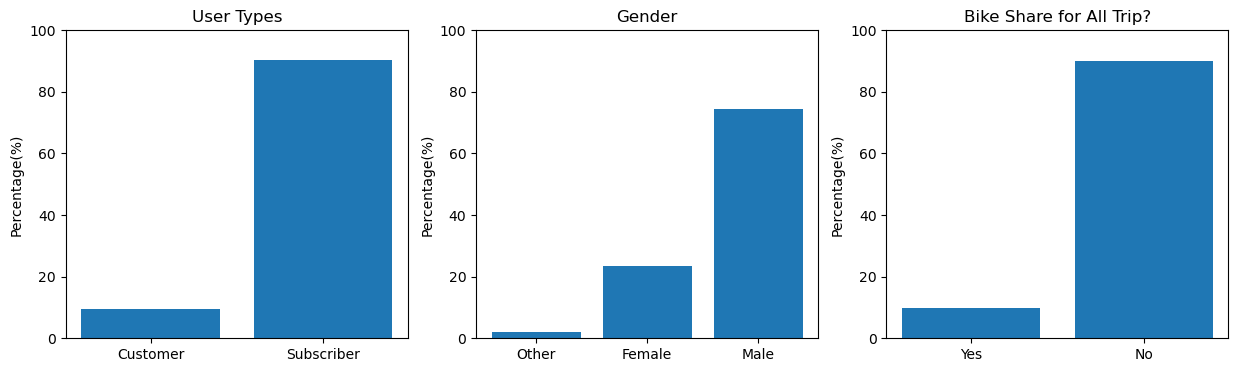

In [48]:
columns = 'user_type', 'member_gender', 'bike_share_for_all_trip'
titles = 'User Types', 'Gender', 'Bike Share for All Trip?'

fig, axes = plt.subplots(1,3, sharey=False, figsize=(15,4))
for c,t,ax in zip(columns, titles, axes):
    df = pd.DataFrame(gobike[c].value_counts(normalize=True, dropna=False)*100)
    df = df.sort_values(c)
    ax.bar(x=list(df.index), height=df[c].values)
    ax.set_ylim(0,100)
    ax.set_ylabel('Percentage(%)')
    ax.set_title(t) 
plt.show()

In [49]:
numerical_cols = gobike.select_dtypes(include='number').columns
numerical_cols = [i for i in numerical_cols if i[-3:]!='_id']
numerical_cols

['duration_min',
 'member_age',
 'temp',
 'humidity',
 'precip',
 'precipprob',
 'route_distance_m',
 'route_duration_min']

In [50]:
categorical_cols = gobike.select_dtypes(include='category')
categorical_cols = list(categorical_cols)
categorical_cols

['user_type',
 'member_gender',
 'bike_share_for_all_trip',
 'start_dayofweek',
 'start_hour',
 'end_dayofweek',
 'end_hour']

## **Ride Duration Distribution**

The ride durations have a log-normal distribution with a very slight skew to the right

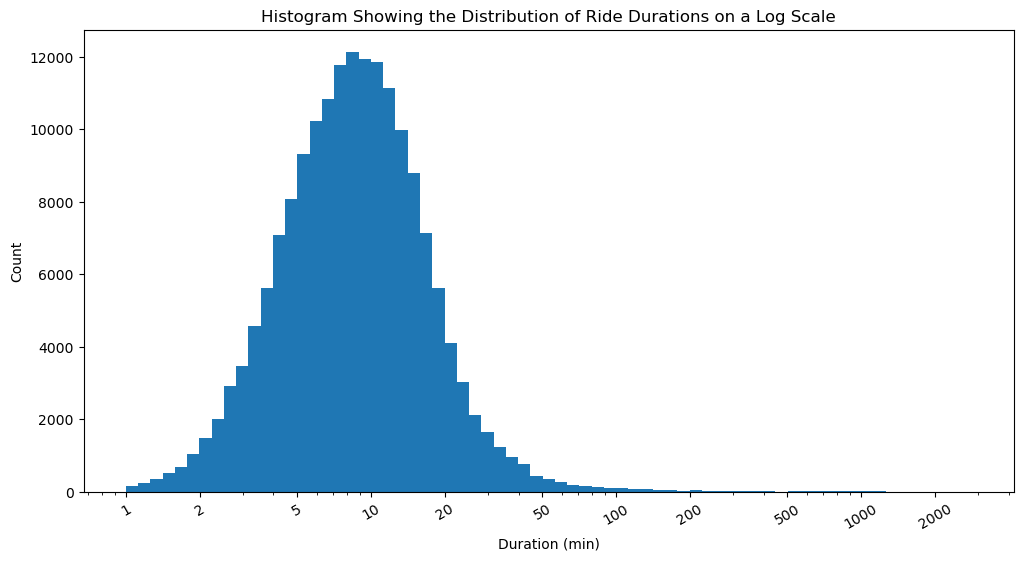

In [51]:
plt.figure(figsize=(12,6))
bins = 10**np.arange(0 ,3.5, .05) ## 10**np.arange(1.78533, 5.25, .1)/60
plt.hist(data=gobike, x='duration_min', bins=bins)
plt.xscale('log')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
xticks = [1,2,5,10,20,50,100,200,500,1000,2000]
plt.xticks(xticks, xticks, rotation=30)
plt.title('Histogram Showing the Distribution of Ride Durations on a Log Scale')
plt.show()

## **Ride Distance Distribution**

The route distances also have a somewhat log-normal distribution with a skew to the left

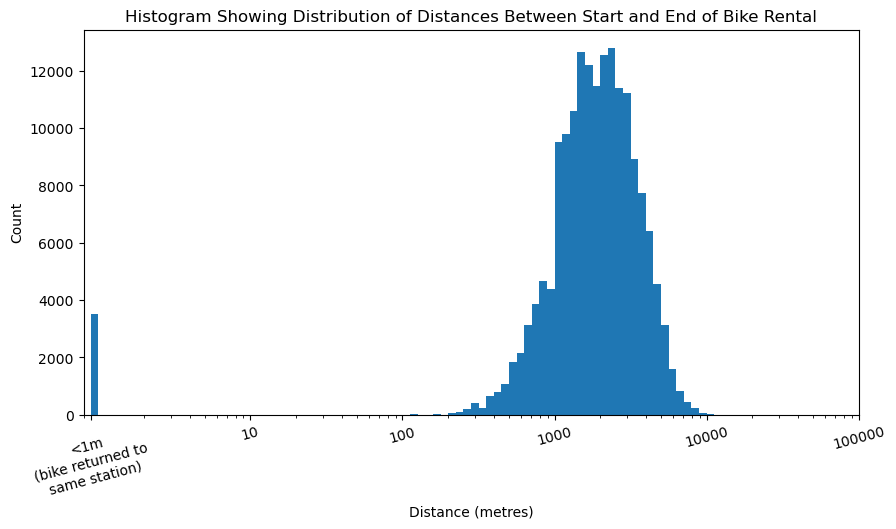

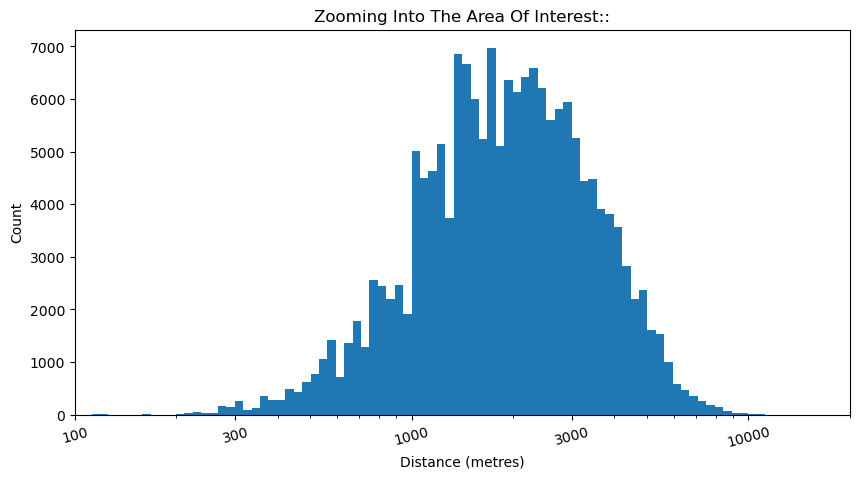

In [52]:
plt.figure(figsize=(10,5))
bins = 10**np.arange(-1, 5.2, 0.05)
plt.hist(x=gobike['route_distance_m']+1, bins=bins)
plt.xscale('log')
xticks = [.9, 10, 100, 1000, 10000, 100000]
xtick_labels = ['<1m\n(bike returned to\nsame station)', '10', '100', '1000', '10000', '100000']
plt.xticks(xticks, xtick_labels, rotation=15)
plt.xlabel('Distance (metres)')
plt.ylabel('Count')
plt.xlim(0.8,100000)
plt.title("Histogram Showing Distribution of Distances Between Start and End of Bike Rental")
plt.show()


plt.figure(figsize=(10,5))
bins = 10**np.arange(-1, 5.2, 0.025)
plt.hist(x=gobike['route_distance_m']+1, bins=bins)
plt.xscale('log')
xticks = [30, 100, 300, 1000, 3000, 10000]
plt.xticks(xticks, xticks, rotation=15)
plt.xlim(100, 20000)
plt.xlabel('Distance (metres)')
plt.ylabel('Count')
plt.title("Zooming Into The Area Of Interest::")
plt.show()

The ages of the riders is very skewed to the right. The ages of the riders peak between 25 to 31 years and it has a long tail from 40 years of age to more than 80 years.

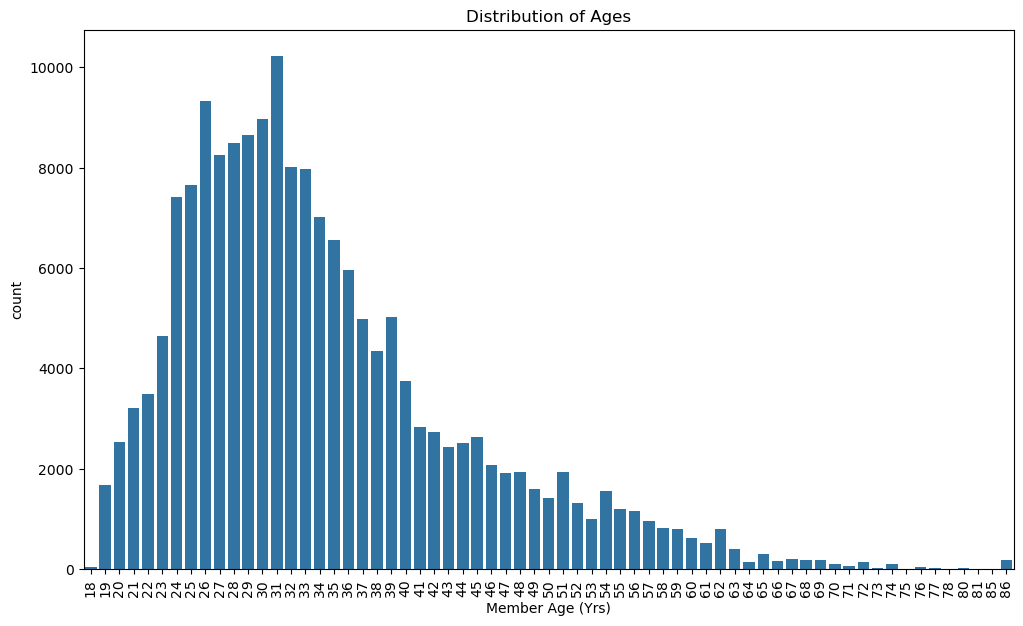

In [53]:
plt.figure(figsize=(12,7))
base_color = sns.color_palette()[0]
sns.countplot(data=gobike, x='member_age', color=base_color);
xticks = gobike['member_age'].value_counts().index
xticks = sorted([int(x) for x in xticks])
plt.xticks(np.arange(len(xticks)), xticks, rotation=90)
plt.xlabel('Member Age (Yrs)')
plt.title('Distribution of Ages')
plt.show()

### **Age Distribution**

The distribution of the ages of shows that most of the riders are primarily the working age population of about 20 to 60. About 50 percent of the riders are within the ages of 25 to 35


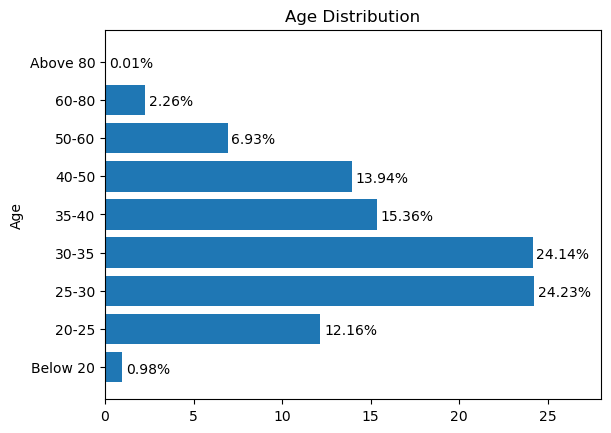

In [54]:
min_age = gobike['member_age'].min(); max_age = gobike['member_age'].max()
bins = [min_age, 20, 25, 30, 35, 40, 50, 60, 80, max_age]
labels = ["Below 20", "20-25", "25-30", "30-35", "35-40", "40-50", "50-60", "60-80", "Above 80"]

gobike['age_group'] = pd.cut(gobike['member_age'], bins=bins, right=False, labels=labels)
plot_df8 = pd.DataFrame(round(gobike['age_group'].value_counts(normalize=True)*100,2))
plot_df8 = plot_df8.reset_index()
plot_df8.columns = ['age_group', 'percentage']
age_group_dtype = pd.api.types.CategoricalDtype(categories=labels, ordered=True)
plot_df8['age_group'] = plot_df8['age_group'].astype(age_group_dtype)
plot_df8 = plot_df8.sort_values('age_group')
plt.barh(data=plot_df8, y=range(plot_df8.shape[0]), tick_label='age_group', width='percentage')
for i,v in enumerate(plot_df8['percentage'].values):
    plt.text(v+.2,i-.15,str(v)+'%')
plt.xlim(0,28)
plt.ylabel('Age')
plt.title('Age Distribution')
plt.show()

<a name="bivariate"></a>

### **Bivariate Exploration**

### **Distribution of Number of Rides by Day of The Week**

The weekdays recorded higher number of trips compared to the weekend with Thursday which recorded the highest average number of trips recording twice as many trips as the averages recorded on Saturday and Sunday. Among the weekdays, Monday had the lowest average number of trips, followed by Friday.

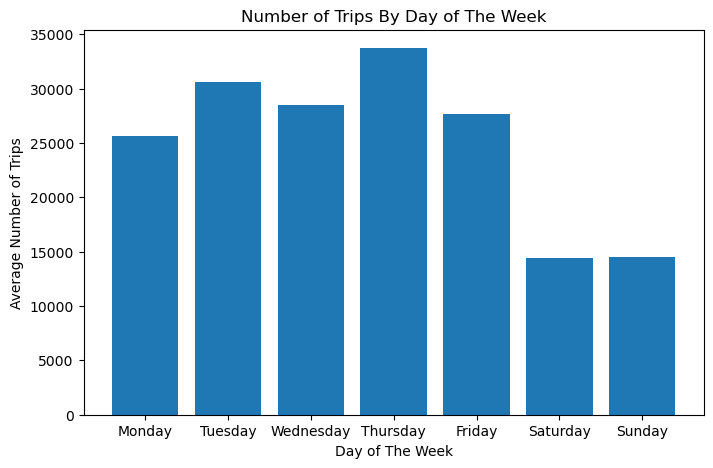

In [76]:
plt.figure(figsize=(8,5))
start_data = gobike.groupby('start_dayofweek')[['duration_min']].count().reset_index()
start_data.columns = ['start_day', 'start_count']
plt.bar(data=start_data, x=range(start_data.shape[0]),  tick_label='start_day', height='start_count');

plt.xlabel('Day of The Week')
plt.ylabel('Average Number of Trips')
plt.title('Number of Trips By Day of The Week')
plt.show()

### **Distribution of Ride Duration by Day of The Week**

The weekend trips were on average significantly slower than the weekday's ride trips. The average speed of the trips on Saturdays and Sundays were slightly above 8km/h while all the working days had average ride speeds in excess of 10km/h

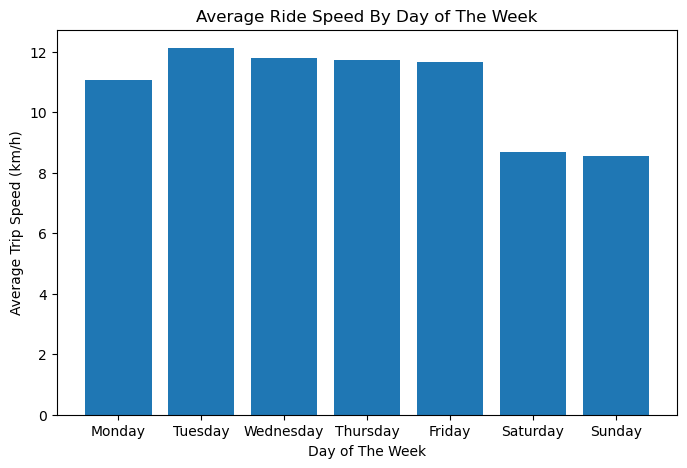

In [77]:
plot_df7 = pd.DataFrame(gobike.groupby('start_dayofweek')['route_distance_m'].mean()/
            gobike.groupby('start_dayofweek')['duration_min'].mean())*60/1000
plot_df7.columns = ['speed (km/h)']
plot_df7 = plot_df7.reset_index()

plt.figure(figsize=(8,5))

plt.bar(data=plot_df7, x=range(plot_df7.shape[0]),  tick_label='start_dayofweek', height='speed (km/h)');

plt.xlabel('Day of The Week')
plt.ylabel('Average Trip Speed (km/h)')
plt.title('Average Ride Speed By Day of The Week')
plt.show()

### **Ride Duration by Region**

The bar plot shows the region of the ride as one of the determinants of the duration of the ride. The average ride duration in East San Jose region is slightly less than 9 minutes while the average ride duration in North San Jose region is slightly less than 15 minutes. The rides that involved crossing from one region to another were the longest. 

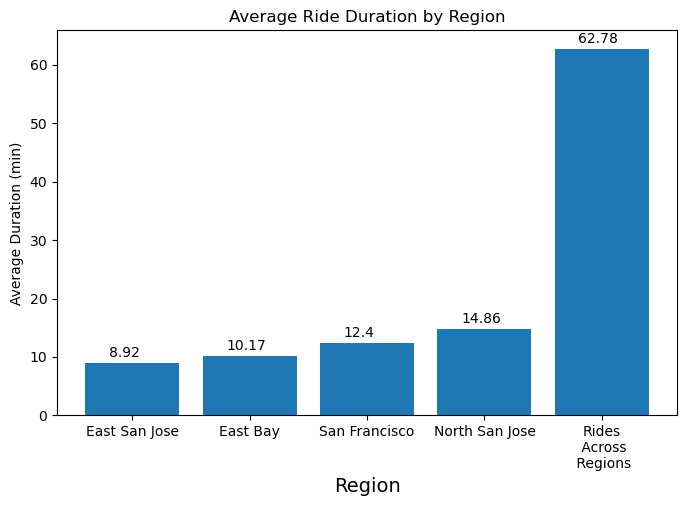

In [57]:
plot_df2 = pd.DataFrame(gobike[gobike['start_region']==gobike['end_region']].groupby('start_region')['duration_min'].mean())
plot_df2 = plot_df2.reset_index()
plot_df2 = plot_df2.sort_values(by='duration_min')

rides_across_mean = gobike[gobike['start_region']!=gobike['end_region']]['duration_min'].mean()
plot_df2.loc[4, ['start_region', 'duration_min']] = ['Rides\n Across\n Regions', rides_across_mean]

plt.figure(figsize=(8,5))
plt.bar(data=plot_df2, x=range(len(plot_df2)), tick_label='start_region', height='duration_min')
for i,v in enumerate(plot_df2['duration_min']):
    plt.text(i-.2, v+1, round(v,2))
plt.xlabel('Region', fontsize=14, fontweight='normal')
plt.ylabel('Average Duration (min)', fontweight='normal')
plt.title("Average Ride Duration by Region")
plt.show()

### **Ride Duration by User Type**

Surprisingly, trips by subscribers are much shorter than trips by customers with the customer trips taking almost twice as long the trips by subscribers. This could be due to most subscriber using the bikes for short regular commutes.

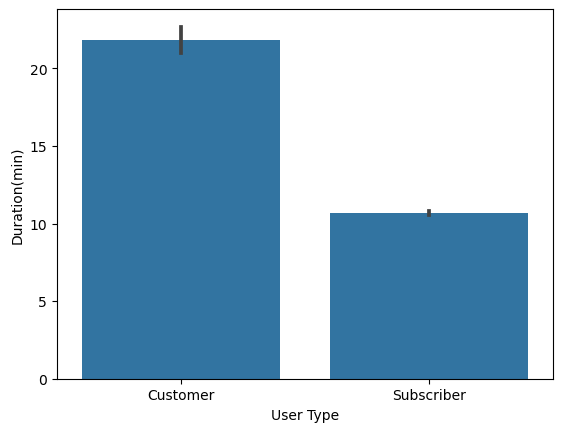

In [58]:
color = sns.color_palette()[0]
sns.barplot(data=gobike, x='user_type', y='duration_min', color=color);
plt.xlabel('User Type')
plt.ylabel('Duration(min)')
plt.show()

### **Comparison of Duration or Round Trips and One Way Trips**

It is surprising that the average duration of round trip rides that start and end at the same station is more than twice as much as the average duration of the one way trips that start and end in different stations yet  most of the shortest trips that took less than 2 minutes are round trips. 

The histograms prove to be very illuminating. While most of the shortest trips taking less than 2 minutes are round trips, round trips also have a very sparse and long distribution that peaks at around 30 minutes and the tail extending as far as more than 1000 minutes (>16 hours)

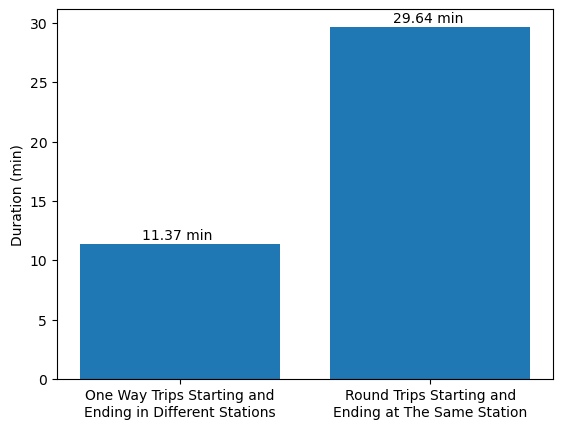

In [59]:
round_trips = gobike[gobike['start_coordinates']==gobike['end_coordinates']]
one_way_trips = gobike[gobike['start_coordinates']!=gobike['end_coordinates']]

height=[one_way_trips.duration_min.mean(), round_trips.duration_min.mean()]
tick_label = ['One Way Trips Starting and\nEnding in Different Stations', 'Round Trips Starting and\nEnding at The Same Station']
plt.bar(x=[0,1], height=height, tick_label=tick_label)
for i,v in enumerate(height):
    plt.text(i-.15,v+.4,str(round(v,2))+' min')
plt.ylabel('Duration (min)')
plt.show()

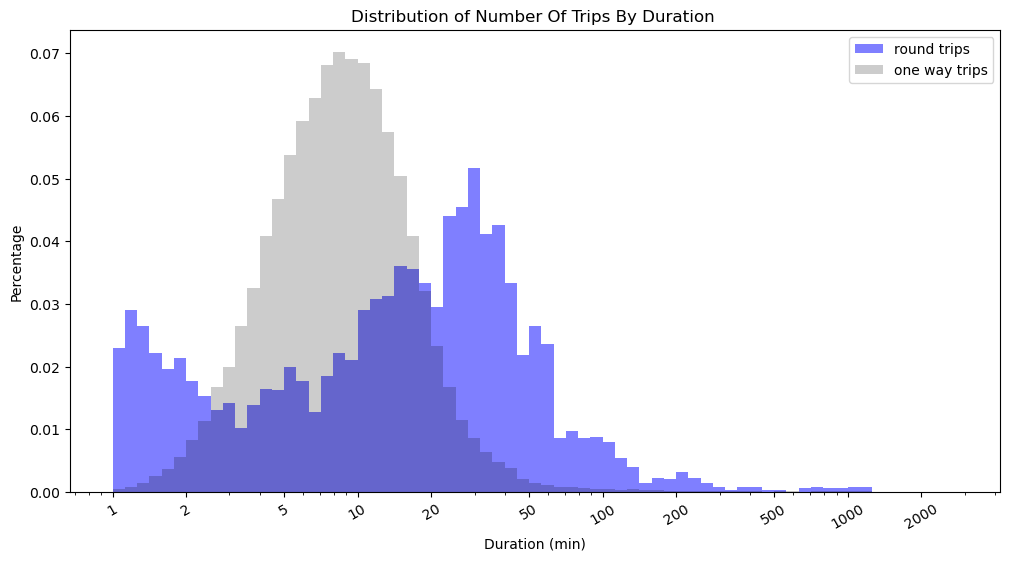

In [78]:
round_trips = gobike[gobike['start_coordinates']==gobike['end_coordinates']]
one_way_trips = gobike[gobike['start_coordinates']!=gobike['end_coordinates']]

plt.figure(figsize=(12,6))
bins = 10**np.arange(0 ,3.5, .05)
#plt.hist(data=gobike, x='duration_sec', bins=bins, color='green', weights=np.ones(len(gobike))/len(gobike), alpha=.5)
plt.hist(data=round_trips, x='duration_min', bins=bins, color='blue', weights=np.ones(len(round_trips))/len(round_trips), alpha=.5, label='round trips')
plt.hist(data=one_way_trips, x='duration_min', bins=bins, color='black', weights=np.ones(len(one_way_trips))/len(one_way_trips), alpha=.2, label='one way trips')

plt.xscale('log')
plt.xlabel('Duration (min)')
plt.ylabel('Percentage')
xticks = [1,2,5,10,20,50,100,200,500,1000,2000]
plt.xticks(xticks, xticks, rotation=30)
plt.legend()
plt.title('Distribution of Number Of Trips By Duration ')
plt.show()

### **Ride Duration by Hour**

The number of rides per hour shows an expected pattern. The rides are highest during the morning and evening commute hours (around 6-9 am and 4-6pm). The night hours record the lowest number of trips especially after 12am and before 5am, at which most people are asleep. During the working hours of the day between 9am to 4pm, the number of trips is also relatively high.

Between 6am to to 8am, more trips start than end as more people start their commutes from home while from 9am to 10am, more trips end than start as most of the people reach their places of work. During the evening commute peak hours, from 3pm to 5pm, more trips start than end as most people start their trips from their places of work to go home while from 6pm to late into the night, 11pm , more trips end than start as more people reach their homes from their places of work.

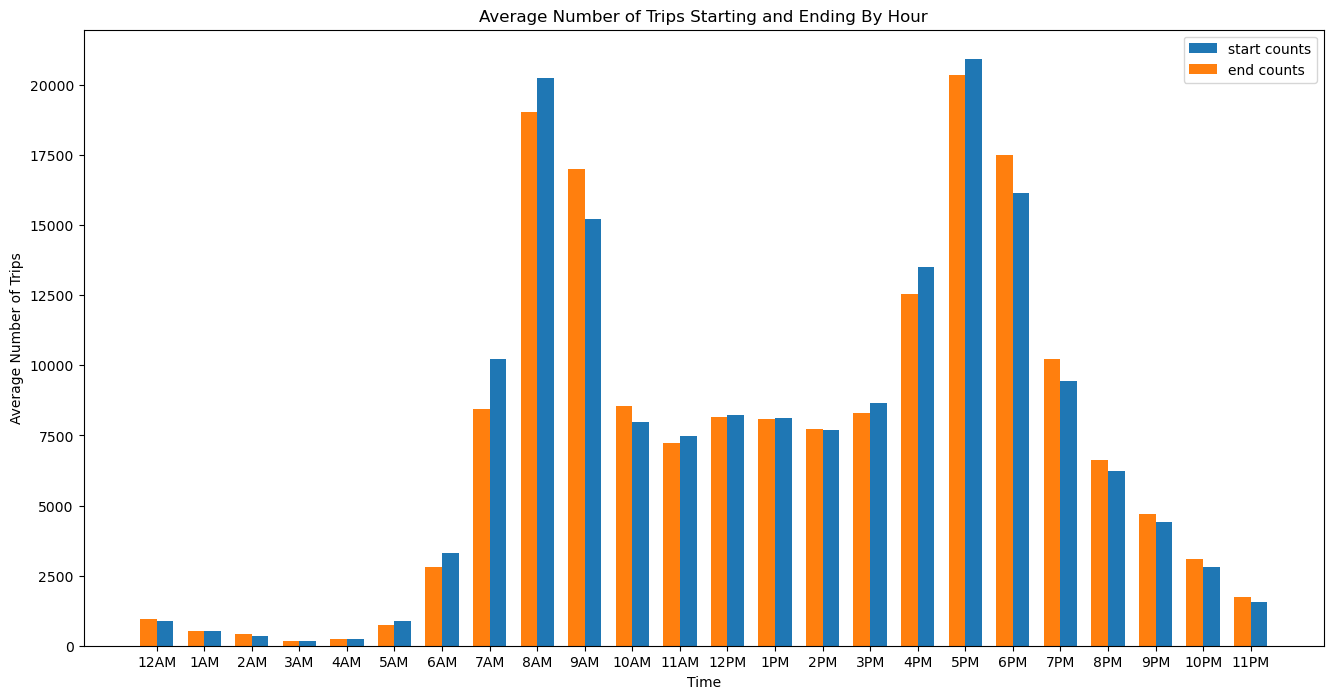

In [61]:
plt.figure(figsize=(16,8))
start_data = gobike.groupby('start_hour')[['duration_min']].count().reset_index()
start_data.columns = ['start_hour', 'start_count']
plt.bar(data=start_data, x=range(start_data.shape[0]),  tick_label='start_hour', height='start_count', width=0.35, align='edge', label='start counts');

end_data = gobike.groupby('end_hour')[['duration_min']].count().reset_index()
end_data.columns = ['end_hour', 'end_count']
plt.bar(data=end_data, x=range(end_data.shape[0]),  tick_label='end_hour', height='end_count', width=-0.35, align='edge', label='end counts');

plt.xlabel('Time')
plt.ylabel('Average Number of Trips')
plt.legend()
plt.title("Average Number of Trips Starting and Ending By Hour")
plt.show()

### **User Types By Gender**

More male than female riders are subscribers.

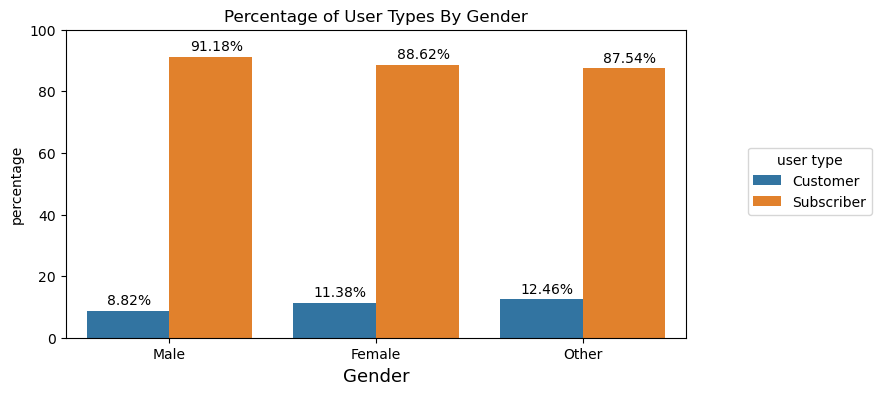

In [62]:
plot_df = pd.DataFrame(round(gobike.groupby('member_gender')['user_type'].value_counts(normalize=True),4)*100)
plot_df=plot_df.reset_index()
plot_df.columns = ['member_gender', 'user_type', 'percentage']
plt.figure(figsize=(8,4))
order = plot_df[plot_df['user_type']=='Customer'].sort_values(by='percentage')['member_gender'].values
sns.barplot(data=plot_df, x='member_gender', hue='user_type', y='percentage', order=order)
subscriber_vals = plot_df[plot_df['user_type']=='Subscriber'].sort_values('percentage', ascending=False).percentage.values
customer_vals = plot_df[plot_df['user_type']=='Customer'].sort_values('percentage', ascending=True).percentage.values
for i,v in enumerate(subscriber_vals):
    plt.text(i+.1,v+2,f'{v:.2f}%')
for i,v in enumerate(customer_vals):
    plt.text(i-.3,v+2,f'{v:.2f}%')
plt.xlabel('Gender', fontsize=13, fontweight='regular')
plt.ylim(0,100)
plt.title('Percentage of User Types By Gender')
plt.legend(loc=[1.1, 0.4], title='user type')
plt.show()

### **Bike Share For All Program Adoption By Region**

The 'Percentage of Bike Share For All Trips By Region' bar plot above shows one of the most divergent statistic among the regions. The plot shows a very successful adoption of the bike share for all program in the East San Jose Region where 78% of the rides are bike share for all rides while in the other regions, the adoption rate is at below 15 percent. San Francisco has the lowest adoption of the program at only 4 percent.

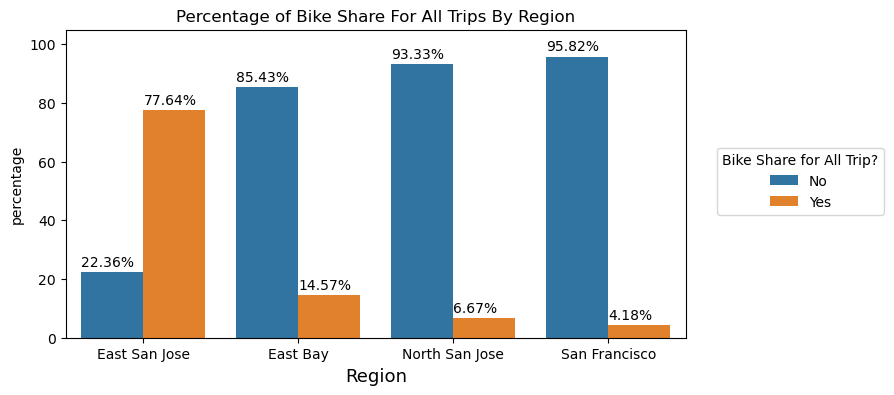

In [63]:
plot_df6 = pd.DataFrame(round(gobike.groupby('start_region')['bike_share_for_all_trip'].value_counts(normalize=True),4)*100)
plot_df6 = plot_df6.reset_index()
plot_df6.columns = ['start_region', 'bike_share_for_all_trip', 'percentage']
plt.figure(figsize=(8,4))
order = plot_df6[plot_df6['bike_share_for_all_trip']=='No'].sort_values(by='percentage')['start_region'].values
sns.barplot(data=plot_df6, x='start_region', hue='bike_share_for_all_trip', y='percentage', order=order)
yes_vals = plot_df6[plot_df6['bike_share_for_all_trip']=='Yes'].sort_values('percentage', ascending=False).percentage.values
no_vals = plot_df6[plot_df6['bike_share_for_all_trip']=='No'].sort_values('percentage', ascending=True).percentage.values

for i,v in enumerate(no_vals):
    plt.text(i-.4,v+2,f'{v:.2f}%')
for i,v in enumerate(yes_vals):
    plt.text(i,v+2,f'{v:.2f}%')
plt.xlabel('Region', fontsize=13, fontweight='regular')
plt.ylim(0,105)
plt.title('Percentage of Bike Share For All Trips By Region')
plt.legend(loc=[1.05, 0.4], title='Bike Share for All Trip?')
plt.show()

### **User Types By Region**

The East San Jose Region also has the highest percentage of subscriber rides at more than 97% while the North San Jose Region has the lowest percentage of rides by subscribers among the regions. More targeted campaigns should be aimed at the North San Jose Region to get more riders to subscribe to the bike share services.  

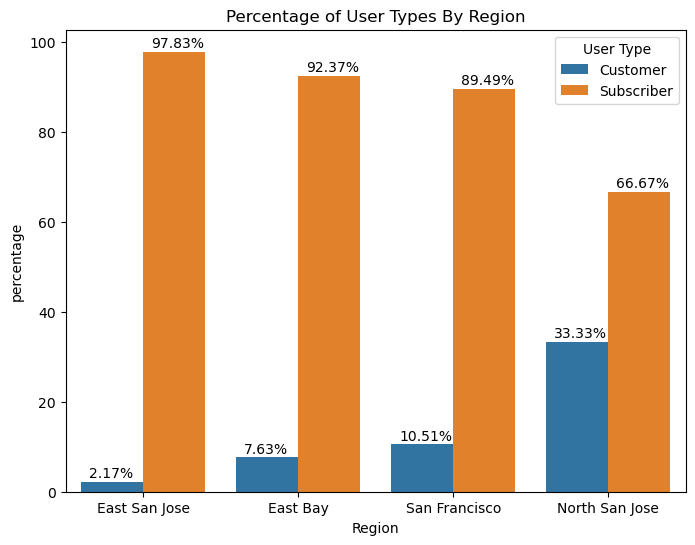

In [79]:
user_type_by_region_df = pd.DataFrame(gobike.groupby('end_region')['user_type'].value_counts(normalize=True)*100)
user_type_by_region_df.reset_index(inplace=True)
user_type_by_region_df.columns = ['end_region', 'user_type', 'percentage']

order = user_type_by_region_df[user_type_by_region_df['user_type']=='Customer'].sort_values('percentage').end_region.values

plt.figure(figsize=(8,6))
sns.barplot(data=user_type_by_region_df, x='end_region', y='percentage', hue='user_type', order=order);

subscriber_vals = (user_type_by_region_df[user_type_by_region_df['user_type']=='Subscriber']
                   .sort_values('percentage', ascending=False)
                   .percentage.values)

customer_vals = (user_type_by_region_df[user_type_by_region_df['user_type']=='Customer']
                   .sort_values('percentage', ascending=True)
                   .percentage.values)

for i,v in enumerate(subscriber_vals):
    plt.text(i+.05,v+1,f'{v:.2f}%')
for i,v in enumerate(customer_vals):
    plt.text(i-.35,v+1,f'{v:.2f}%')
plt.xlabel('Region')
plt.legend(title='User Type')
plt.title('Percentage of User Types By Region')
plt.show()

Surprisingly, there doesn't seem to be a clear correlation between the age of the riders and the duration of the trips. However it is clear that all the trips that took longer than 360 minutes (6hrs) were all by people younger than 60 years

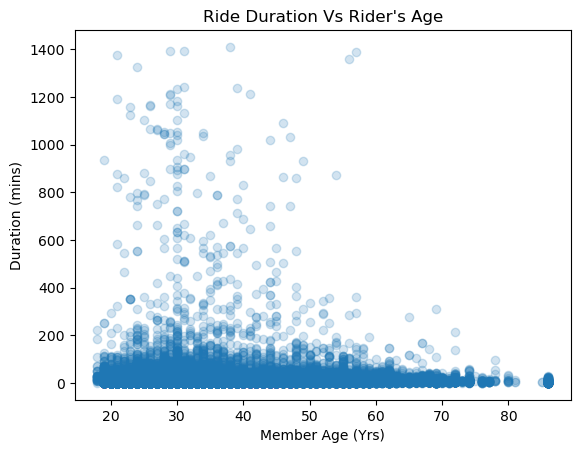

In [65]:
plt.scatter(data=gobike, x='member_age', y='duration_min', alpha=0.2);
plt.xlabel('Member Age (Yrs)')
plt.ylabel('Duration (mins)')
plt.title("Ride Duration Vs Rider's Age")
plt.show()

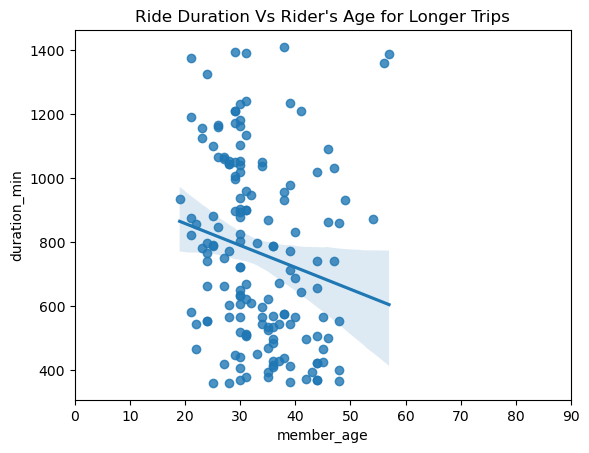

In [66]:
## Plot the longer rides
sns.regplot(data=gobike.query('duration_min>360'), x='member_age', y='duration_min')
plt.xlim(0,90)
plt.title("Ride Duration Vs Rider's Age for Longer Trips")
plt.show()

### **Gender Distribution By Region**

The East Bay has the highest percentage of female riders at 26%, followed by North and East San Jose Regions respectively at 22 and 20 percent respectively. The East San Jose Region has the lowest percentage of female riders as the female riders consist only 13 percent of the riders in the region. 


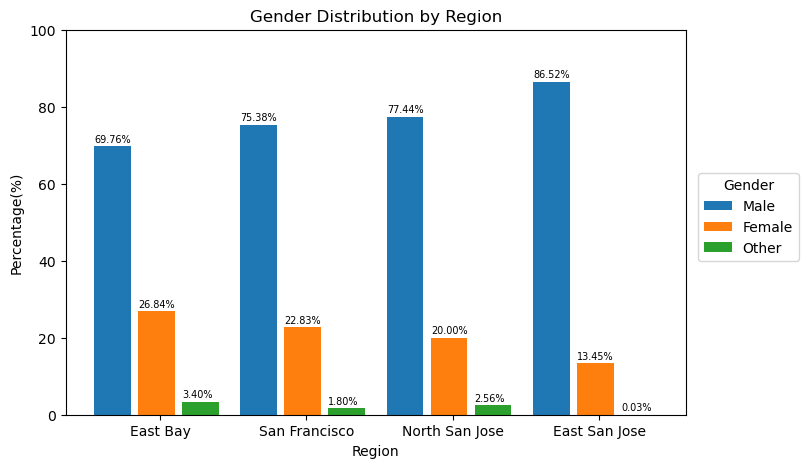

In [67]:
gender_by_region_df = pd.DataFrame(gobike.groupby('start_region')['member_gender'].value_counts(normalize=True)*100)
gender_by_region_df.reset_index(inplace=True)
gender_by_region_df.columns = ['start_region', 'member_gender', 'percentage']


df = gender_by_region_df[gender_by_region_df.member_gender=='Male']
df = df.set_index('start_region')
df = df.drop(columns=['member_gender'])
df.columns=['male_percentage']
df['female_percentage'] = gender_by_region_df[gender_by_region_df.member_gender=='Female'].set_index('start_region')['percentage']
df['other_percentage'] = gender_by_region_df[gender_by_region_df.member_gender=='Other'].set_index('start_region')['percentage']
df = df.sort_values('male_percentage')

plt.figure(figsize=(8,5))
plt.bar(x=np.arange(4), height=df['male_percentage'], width=0.25, align='edge', label='Male')
plt.bar(x=np.arange(4)+.3, height=df['female_percentage'], width=0.25, align='edge', label='Female')
plt.bar(x=np.arange(4)+.6, height=df['other_percentage'], width=0.25, align='edge', label='Other')

for i,[male,female,other] in enumerate(df.values):
    plt.text(i,male+1,f'{male:.2f}%', fontsize=7)
    plt.text(i+.3,female+1,f'{female:.2f}%', fontsize=7)
    plt.text(i+.6,other+1,f'{other:.2f}%', fontsize=7)

plt.ylim(0,100)
plt.xticks(ticks=np.arange(4)+.45, labels=list(df.index))
plt.ylabel('Percentage(%)')
plt.xlabel('Region')
plt.legend(loc=[1.02,0.4], title='Gender')
plt.title('Gender Distribution by Region')
plt.show()

### **Correlation Between Numerical Columns**

The route distance and route duration are strongly positively correlated. The precipitation level, precipitation probability and humidity levels also have strong correlations. 

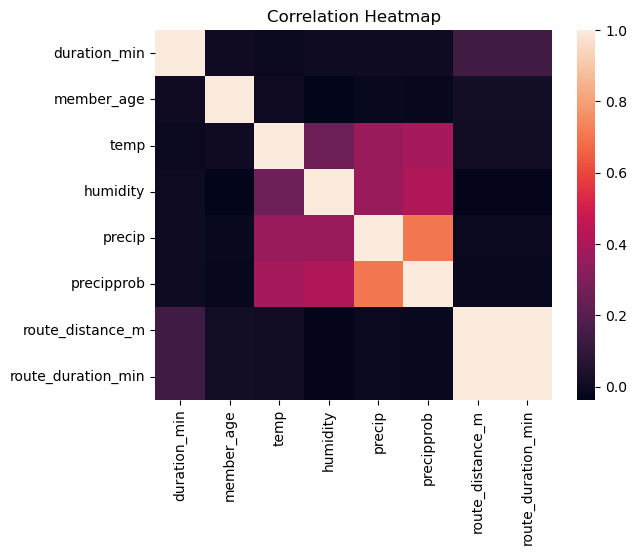

In [68]:
sns.heatmap(gobike[numerical_cols].corr())
plt.title("Correlation Heatmap")
plt.show()

### **Distribution of Age By Gender**


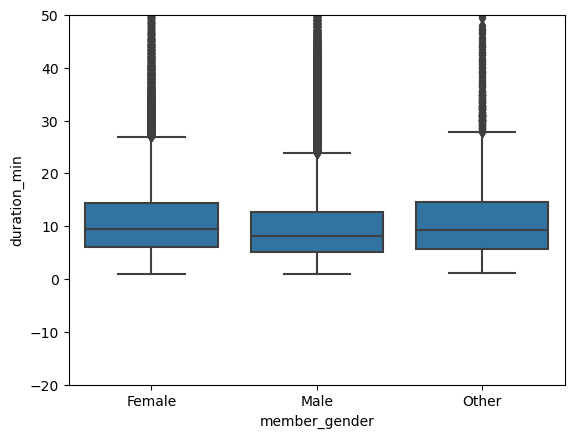

In [69]:
sns.boxplot(data=gobike, x='member_gender', y='duration_min', color=color)
plt.ylim(-20,50)
plt.show()

### **Distribution of Age By Gender**

The ages of the male and female riders have the same general distribution. The median age of the male riders is slightly higher the median age of female riders. The ages of the male riders appear to be slightly more spread out due to the slightly higher inter quartile range

The distribution of age by gender as shown in the violin plot shows a rather interesting pattern. For the Male and Female Genders, the ages are long tailed with the highest density at around 30 years. However, the 'Other' Gender has a small peak at the 50 years age mark

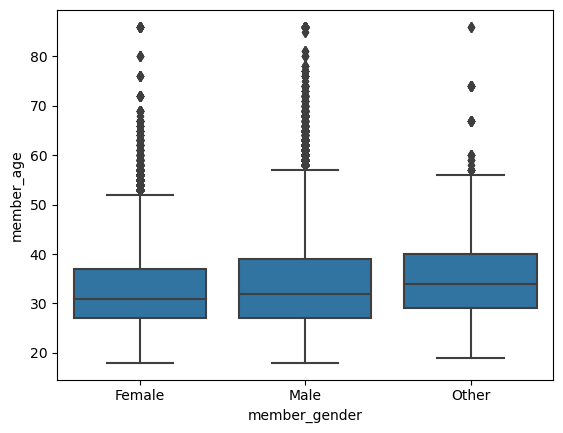

In [70]:
color = sns.color_palette()[0]
sns.boxplot(data=gobike, x='member_gender', y='member_age', color=color)
plt.show()

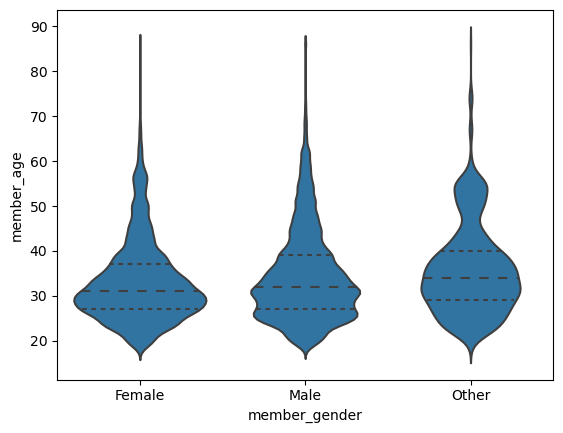

In [71]:
sns.violinplot(data=gobike, x='member_gender', y='member_age', inner="quartile", color=color);

### **User Types By Day of The Week**

During the working days, rides by customers constitute less than 10 percent of the rides with Tuesday and Wednesday recording the lowest percentages of rides by casual customer users at 7.5% . However during the weekends, rides by customers constitute a higher percentage with both Saturday and Sunday recording more than 15 percent rides by customers. 

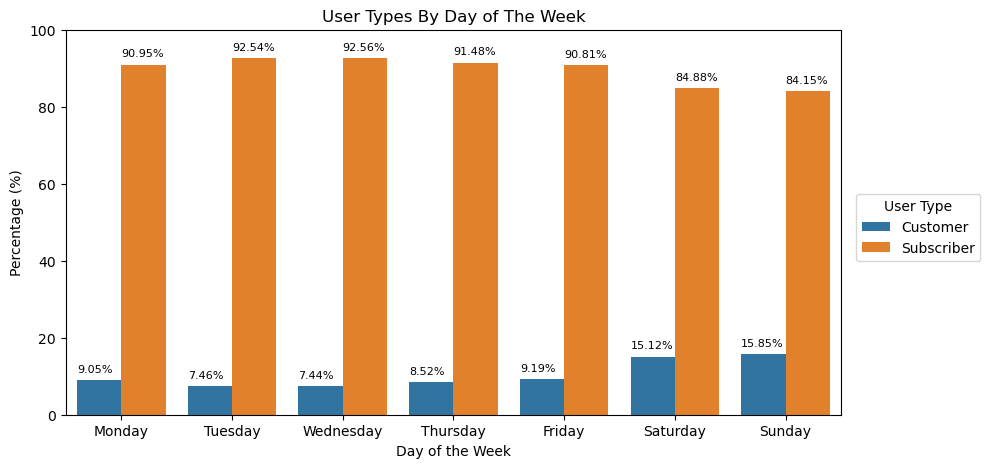

In [80]:
plot_df5 = pd.DataFrame(gobike.groupby('start_dayofweek')['user_type'].value_counts(normalize=True)*100)
plot_df5.reset_index(inplace=True)
plot_df5.columns = ['start_dayofweek', 'user_type', 'percentage']

plt.figure(figsize=(10,5))
sns.barplot(data=plot_df5, x='start_dayofweek', y='percentage', hue='user_type', order=days_order)
plt.ylabel('Percentage (%)')
plt.xlabel('Day of the Week')
plt.ylim(0,100)
subscriber_vals = plot_df5[plot_df5['user_type']=='Subscriber'].percentage.values
customer_vals = plot_df5[plot_df5['user_type']=='Customer'].percentage.values
for i,v in enumerate(subscriber_vals):
    plt.text(i,v+2,f'{v:.2f}%', fontsize=8)
for i,v in enumerate(customer_vals):
    plt.text(i-.4,v+2,f'{v:.2f}%', fontsize=8)
plt.legend(loc=[1.02,.4], title='User Type')
plt.title('User Types By Day of The Week')
plt.show()

### **Ride Duration By Hour**

The distribution of the durations by hour of the day show that the commute hours have the shortest trips. The distribution of the average duration has two troughs, one from 5am to 9am and another from 5pm to 9pm.  

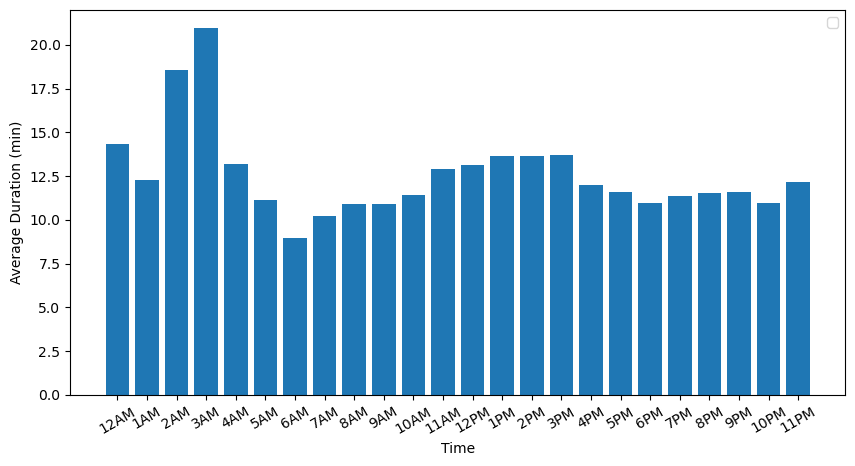

In [73]:
plot_df3 = pd.DataFrame(gobike.groupby('end_hour')['duration_min'].mean() + 
                        gobike.groupby('start_hour')['duration_min'].mean())/2
plot_df3 = plot_df3.reset_index()
plot_df3.columns = ['hour', 'avg_duration_min']

plt.figure(figsize=(10,5))
plt.bar(data=plot_df3, x=range(len(plot_df3)), tick_label='hour', height='avg_duration_min')
plt.xlabel('Time')
plt.ylabel('Average Duration (min)')
plt.xticks(rotation=30)
plt.legend()
plt.show()

## **Multivariate Exploration**

In [74]:
## Get the average daily rainfall weighted by the trip counts in every region
regions_significance = gobike.start_region.value_counts(normalize=True)
gobike['daily_precip'] = 0
for region in regions_significance.index:
    filt = weather_data['region']==region
    df = weather_data[filt].groupby(weather_data.datetime.dt.floor('D'))['precip'].sum()
    gobike['daily_precip'] += gobike['start_time'].apply(lambda x : df[str(x.date())]) * regions_significance[region]

## **Factors Affecting Daily Number of Trips**

- Rainfall significantly affects the number of trips, especially on the first day when there is a sudden increase the precipitation levels
- The number of trips are significantly lower on the holidays and weekends. 
- During the weekdays, the number of rides peak twice : during the morning and evening commute hours while during the weekends and holidays, the number of rides peak once during the day in the afternoon

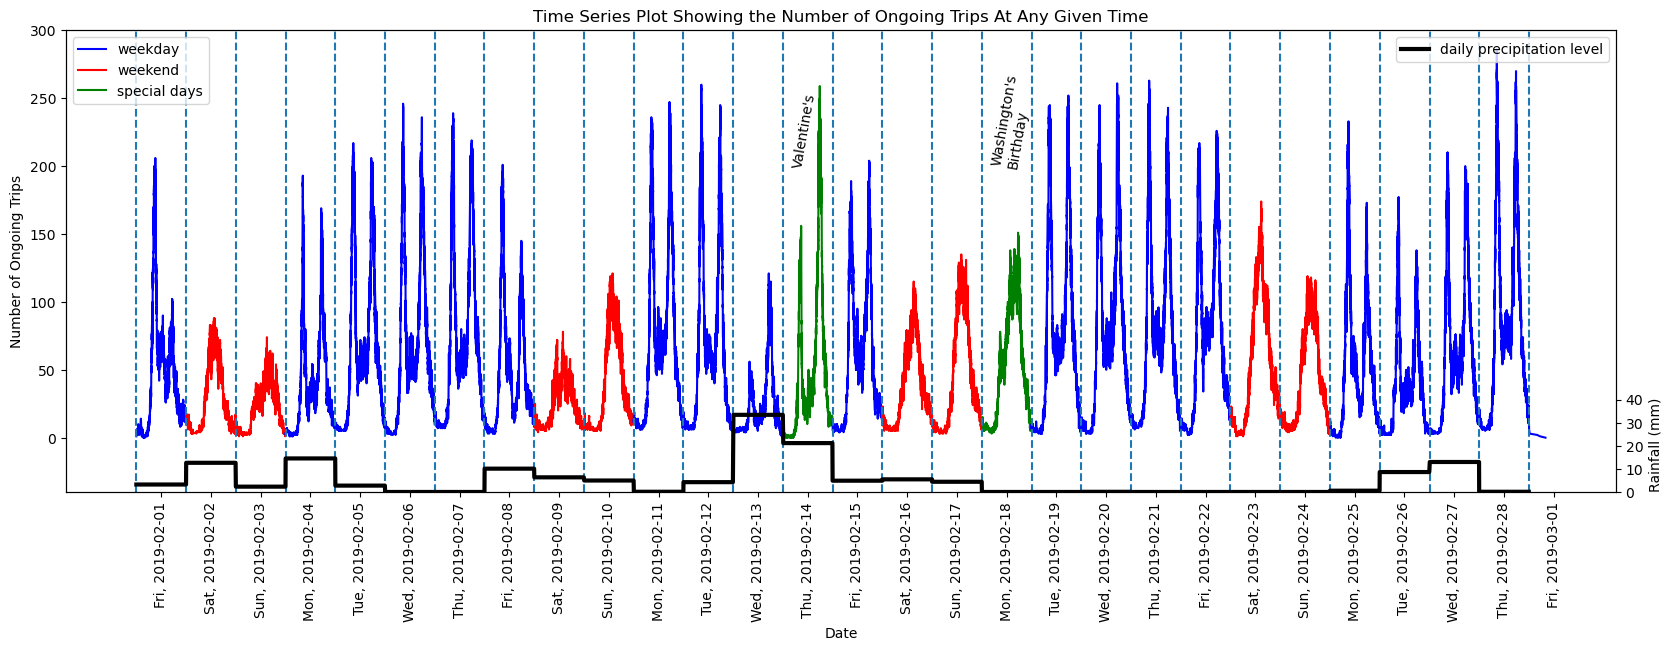

In [75]:
special_days = {
    pd.to_datetime('2019-02-14') : "Valentine's",
    pd.to_datetime('2019-02-18'): "Washington's\nBirthday"
}

time_series_df = gobike[['start_time', 'end_time']].melt(value_name='time').sort_values('time')
time_series_df['add_value'] = time_series_df['variable'].apply(lambda x : [-1,1][x=='start_time'])
time_series_df['cumulative_bikes_borrowed'] = time_series_df.add_value.cumsum(axis=0)
xticks = np.arange(np.datetime64("2019-02-01"), np.datetime64("2019-03-02"), np.timedelta64(24, "h"))
xticks_df = pd.DataFrame(xticks)
xticks_df['day'] = xticks_df[0].apply(lambda x : x.strftime('%a'))
xticks_ = (xticks_df['day'] + ', ' + xticks_df[0].astype(str)).values

fig, ax = plt.subplots(figsize = (20, 6))
labelled = [0,0,0]
for date, group in time_series_df.groupby(time_series_df['time'].dt.floor('D')):
    if date in list(special_days.keys()):
        color = 'green'
        ax.text(date+np.timedelta64(4,'h'), 200, special_days[date], fontsize=10, rotation=80)
        if labelled[0]==0:
            label='special days' ; labelled[0]=1
        else : label=''
    elif date.strftime('%w') in ['6','0']:
        color = 'red'
        if labelled[1]==0:
             label= 'weekend' ; labelled[1]=1
        else : label=''
    else :
        color = 'blue'
        if labelled[2]==0:
            label='weekday' ; labelled[2]=1
        else : label=''
    ax.plot(group['time'], group['cumulative_bikes_borrowed'], color=color, label=label)
    ax.axvline(group.time.min(), linestyle='--')
precip_data = gobike.sort_values('start_time').copy()
ax2 = ax.twinx()
ax2.plot(precip_data['start_time'], precip_data['daily_precip'], color='black', linewidth=3, label='daily precipitation level')
ax.set_ylim(ymin=-40)
ax2.set_ylim(0,200)
plt.title("Time Series Plot Showing the Number of Ongoing Trips At Any Given Time")
ax.set_xticks(xticks+np.timedelta64(12,'h'), xticks_, rotation=90)
ax2.set_yticks(np.arange(0,41,10), np.arange(0,41,10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of Ongoing Trips')
ax2.set_ylabel('Rainfall (mm)', loc='bottom')
ax.legend()
ax2.legend()
plt.show()

In [1]:
## Slideshow 
!jupyter nbconvert part-2-udacity-project-3-slide-deck-notebook-3.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook part-2-udacity-project-3-slide-deck-notebook-3.ipynb to slides
[NbConvertApp] Writing 687938 bytes to part-2-udacity-project-3-slide-deck-notebook-3.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filena